## convex, strongly convex functions

__1.__ (2 pts) Write the definitions of convex and strongly convex functions. Provide the example of strongly convex function and find the corresponding constant of strongly convexity

Function f: $X$ $\subset$ $\mathbb{R}^n$ $\rightarrow$ $\mathbb{R}$ is called convex if $X$ is convex set and $\forall$ $x_1, x_2 \in X$ and $\alpha \in [0,1]$ we have:
$$
f(\alpha x_1+(1-\alpha)x_2) \leq \alpha f(x_1)+(1-\alpha)f(x_2)
$$

Function f: $X$ $\subset$ $\mathbb{R}^n$ $\rightarrow$ $\mathbb{R}$ is called strictly convex if $X$ is convex set and $\forall$ $x_1, x_2 \in X$ and $\alpha \in (0,1)$ we have:
$$
f(\alpha x_1+(1-\alpha)x_2) < \alpha  f(x_1)+(1-\alpha)f(x_2)
$$

Function f: $X$ $\subset$ $\mathbb{R}^n$ $\rightarrow$ $\mathbb{R}$ is called strongly convex with constant $m>0$ if $X$ is convex set and $\forall$ $x_1, x_2 \in X$ and $\alpha \in [0,1]$ we have:
$$
f(\alpha x_1+(1-\alpha)x_2) \leq \alpha f(x_1)+(1-\alpha)f(x_2) - \frac{m}{2}\alpha(1-\alpha)||x_1-x_2||_2^2
$$

The example of the strongly convex function is:
$$
f(x) = x^2
$$
because you can construct a quadratic lower bound at any point, with constant $m=2$, which is found by $f^"(x) = 2$

## convex set

__2.__ (2 pts) Write the definition of convex set. Check if the following set $G$ is convex or not and explain your result.

$$
G = \{ x \in \mathbb{R}^n \mid A_0 + x_1A_1 + \ldots + x_nA_n \succeq 0 \},
$$

where all $A_i$ are symmetric matrices $n \times n$, the notation $X \succeq 0$ means that matrix $X$ is symmetric positive semidefinite.

#### Answer:
A set $X$ $\in \mathbb{R}^n$ is convex, if for all $\alpha \in [0,1]$ and for any x, y $\in X$ the following holds:
$$
\alpha x + (1-\alpha)y  \in X
$$

$
A_0 + (\alpha x + (1-\alpha)y)A_1 + ... + (\alpha x_n+(1-\alpha)y_n)A_n = \alpha(A_0 + x_1A_1 + \ldots + x_nA_n)+(1-\alpha)(A_0 + y_1A_1 + \ldots + y_nA_n)
$
so by deffinition the set G is convex.

## KKT conditions 

__3.__ Consider the following problem

$$
\min_w \frac{1}{2}\|w\|_2^2 + \sum_{i=1}^m \max(0, 1 - y_iw^{\top}x_i),
$$

where $y_i \in \mathbb{R}$ and $x_i \in \mathbb{R}^n$ are given scalars and vectors.

- (1 pts) Is this problem smooth or not? Explain your answer
- (1 pts) Is this problem convex or not? Explain your answer
- (1 pts) If this problem is not smooth, transform it into equivalent smooth problem
- (2 pts) Write the KKT conditions for smooth form of this problem or to the original problem if you decide that it is smooth already
- (1 pts) Are KKT conditions sufficient for this problem? Why? 

1. the function is non-smooth, since $max(0, 1 - y_iw^{\top}x_i)$ is not differentiable
2. the problem is convex, since the square of euqclidean norm is convex and second part of equation will give any value between [0,1]. So the sum (linear combination) of both will give the convexity.
3. $$
\min_w \frac{1}{2}\|w\|_2^2 + \sum_{i=1}^m (1 - y_iw^{\top}x_i),
$$

$$
s.t. (1 - y_iw^{\top}x_i) \geq 0, for \ i = 1..m
$$

$L(w^*,\mu^*) = f(w^*) + \sum_{i=1}^p \mu_i^*(y_iw^{*\top}x_i - 1)$

4. KKT conditions:


1) $y_iw^{*\top}x_i - 1 \leq 0$

2) $\mu_i^* \geq 0$

3) $\mu_i^*(y_iw^{*\top}x_i - 1)= 0$

4) $L'(w^*,\mu^*)= w^* - \sum_{i=1}^p y_ix_i + \sum_{i=1}^p \mu_i^*y_ix_i = 0$

## results
KKT conditon is sufficient, since the constraints and the problem is convex.

## Newton method 

__4.__ Consider the problem

$$
\log (e^x + e^{-x}) \to \min_x.
$$

- (2 pts) Implement and run Newton method with constant step size  $\alpha = 1$ and initial guesses $x_0 = 1$ and $x_0 = 1.1$. What do you observe and why?
- (1 pts) What is changed if you use damped Newton method? Why?
- (1 pts) Make convergence plots for every experiment setting and compute the running time of every method. Do not forget to add legends and axis labels. As a convergence measure, use the norm of gradient in every iteration.

$(log(e^x + e^{-x}))'' = (\frac{e^{2x}-1}{e^{2x}+1})' = \frac{4e^{2x}}{(e^{2x}+1)^2} \geq 0$ -> convex function

In [1]:
import jax
from jax import grad
from jax import jit
import jax.numpy as jaxnp

In [2]:
problem = lambda x: jaxnp.log(jaxnp.exp(x) + jaxnp.exp(-x))
grad = jax.grad(problem, argnums=0, has_aux=False)
hess = jax.hessian(problem, argnums=0)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcdefaults()

In [4]:
def newtonMethod(f, gradf, hessf, x0, epsilon, num_iter, line_search, disp=False, callback=None, **kwargs):
    x = x0
    iteration = 0
    opt_arg = {"f": f, "grad_f": gradf}
    x_history = []
    grad_history = []
    for key in kwargs:
        opt_arg[key] = kwargs[key]
    while True:
        grad = gradf(x)
        hess = hessf(x)
        h = -grad/hess
        alpha = 1
        x = x + alpha * h
        if callback is not None:
            callback(x)
        iteration += 1
        grad_history.append(np.linalg.norm(gradf(x)))
        x_history.append(x)
        if disp:
            print("Current function val =", f(x))
            print("Current gradient norm = ", np.linalg.norm(gradf(x)))
        if np.linalg.norm(gradf(x)) < epsilon:
            break
        if iteration >= num_iter:
            break
    return grad_history 

In [5]:
def newtonMethodDamped(f, gradf, hessf, x0, epsilon, num_iter, line_search, disp=False, callback=None, **kwargs):
    x = x0
    iteration = 0
    opt_arg = {"f": f, "grad_f": gradf}
    x_history = []
    grad_history = []
    for key in kwargs:
        opt_arg[key] = kwargs[key]
    while True:
        grad = gradf(x)
        hess = hessf(x)
        h = -grad/hess
        alpha = 0.9  # 0 < α < 1
        x = x + alpha * h
        if callback is not None:
            callback(x)
        iteration += 1
        grad_history.append(np.linalg.norm(gradf(x)))
        x_history.append(x)
        if disp:
            print("Current function val =", f(x))
            print("Current gradient norm = ", np.linalg.norm(gradf(x)))
        if np.linalg.norm(gradf(x)) < epsilon:
            break
        if iteration >= num_iter:
            break
    return grad_history 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CPU times: user 86.7 ms, sys: 82 µs, total: 86.8 ms
Wall time: 86.8 ms
Found solution for Netwton method in 5 iterations
CPU times: user 101 ms, sys: 771 µs, total: 102 ms
Wall time: 101 ms
Found solution for damped Netwton, alpha = 0.9 method in 6 iterations


Text(0.5, 1.0, 'Convergence for x0=1, Newton and damped Newton methods')

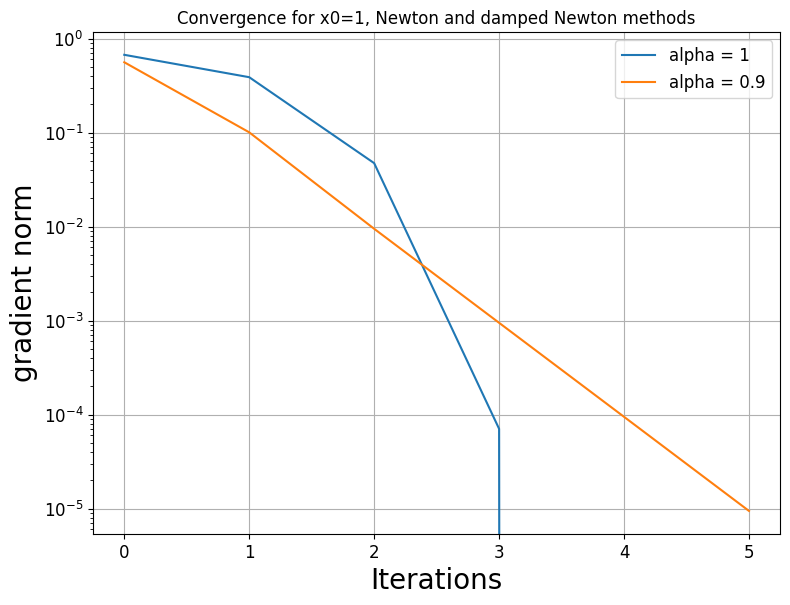

In [6]:
x0 = 1.
plt.figure(figsize=(8,6))
plt.xlabel("Iterations", fontsize=20)
plt.ylabel("gradient norm", fontsize=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(loc="best", fontsize=12)
plt.grid(True)
plt.tight_layout()

grad_history = newtonMethod(problem, grad, hess, x0, 1e-5, num_iter = 500, line_search = None, disp=False, callback=None)
import timeit
%time grad_history = newtonMethod(problem, grad, hess, x0, 1e-5, num_iter = 500, line_search = None, disp=False, callback=None)

print(f"Found solution for Netwton method in {len(grad_history)} iterations")

grad_historyD = newtonMethodDamped(problem, grad, hess, x0, 1e-5, num_iter = 500, line_search = None, disp=False, callback=None)
%time grad_historyD = newtonMethodDamped(problem, grad, hess, x0, 1e-5, num_iter = 500, line_search = None, disp=False, callback=None)

print(f"Found solution for damped Netwton, alpha = 0.9 method in {len(grad_historyD)} iterations")
plt.semilogy(grad_history, label=r"alpha = 1")
plt.semilogy(grad_historyD, label=r"alpha = 0.9")
plt.legend(loc="best", fontsize=12)

plt.title('Convergence for x0=1, Newton and damped Newton methods')

CPU times: user 7.99 s, sys: 5.7 ms, total: 8 s
Wall time: 8 s
Found solution for Netwton method in 500 iterations


Text(0.5, 1.0, 'Convergence for x0=1.1, Newton method')

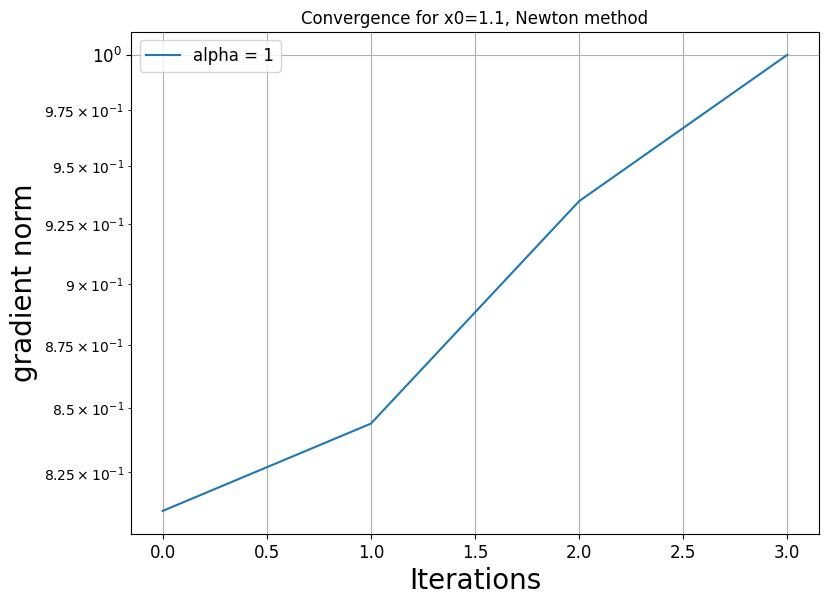

In [7]:
x0 = 1.1
plt.figure(figsize=(8,6))
plt.xlabel("Iterations", fontsize=20)
plt.ylabel("gradient norm", fontsize=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(loc="best", fontsize=12)
plt.grid(True)
plt.tight_layout()

grad_history = newtonMethod(problem, grad, hess, x0, 1e-5, num_iter = 500, line_search = None, disp=False, callback=None)
import timeit
%time grad_history = newtonMethod(problem, grad, hess, x0, 1e-5, num_iter = 500, line_search = None, disp=False, callback=None)
print(f"Found solution for Netwton method in {len(grad_history)} iterations")

plt.semilogy(grad_history,label=r"alpha = 1")
plt.legend(loc="best", fontsize=12)
plt.title('Convergence for x0=1.1, Newton method')


## results
in 5 interations we achieve the tollerance of 1e-5 with initial point 𝑥0=1, when we increase the initial point 𝑥0=1.1, we will not achieve the tollerance, since gradient starts to increase. Here we can apply the less step size, by applying the damped newton method.

CPU times: user 96.4 ms, sys: 349 µs, total: 96.8 ms
Wall time: 96.5 ms
Found solution for damped Netwton, alpha = 0.9 method in 6 iterations


Text(0.5, 1.0, 'Convergence for x0=1.1, damped Newton method')

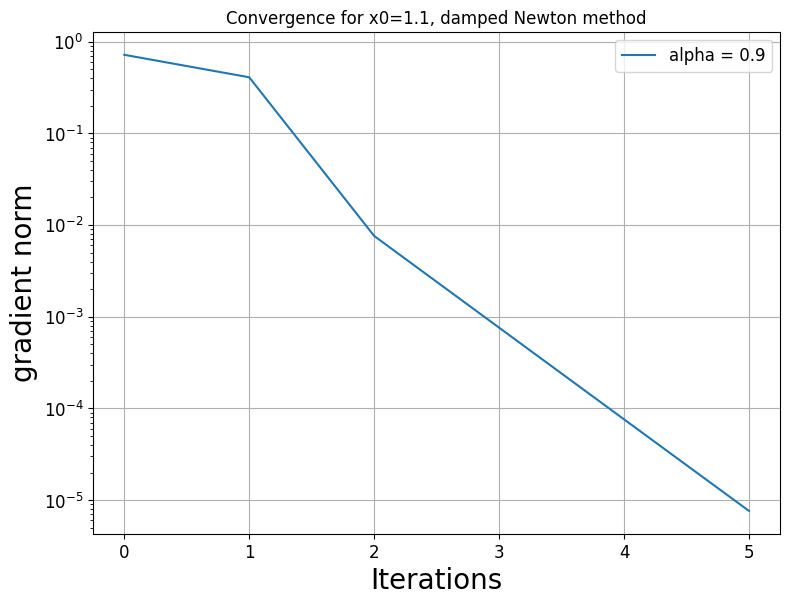

In [8]:
x0 = 1.1
plt.figure(figsize=(8,6))
plt.xlabel("Iterations", fontsize=20)
plt.ylabel("gradient norm", fontsize=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(loc="best", fontsize=12)
plt.grid(True)
plt.tight_layout()

grad_historyD = newtonMethodDamped(problem, grad, hess, x0, 1e-5, num_iter = 500, line_search = None, disp=False, callback=None)
import timeit
%time grad_historyD = newtonMethodDamped(problem, grad, hess, x0, 1e-5, num_iter = 500, line_search = None, disp=False, callback=None)
print(f"Found solution for damped Netwton, alpha = 0.9 method in {len(grad_historyD)} iterations")

plt.semilogy(grad_historyD,label=r"alpha = 0.9")
plt.legend(loc="best", fontsize=12)
plt.title('Convergence for x0=1.1, damped Newton method')

## results

with damped method and initial x0=1.1 we can get the tolerance in 6 iterations, because the step size is reduced. The convergence became **global**.

##  the minimization problem of quadratic function

__5.__ (3 pts) Consider the minimization problem of quadratic function

$$ \frac12 x^{\top}Ax - b^\top x \to \min_x, $$

where $A \succ 0$. Derive the analytical expression for the step size in gradient descent following the steepest descent rule. Your answer has to depend on the iteration number.

if matrix is symmetric:
$$
\nabla f(x_k) = \frac{1}{2}(A + A^T)x - b = Ax - b
$$

GD:
$$ 
\begin{align}
x_{k+1} &= x_k - \alpha_k \nabla f(x_k)\\
        &= x_k - \alpha_k (Ax - b)
\end{align}
$$
SGD:
$$
\alpha_k = \arg\min_{\alpha \geq 0} f(x_k - \alpha f'(x_k))
$$

in steepest descent two sequential points are othogonal, therefore:
$$
\Delta f(x_{k+1})^T\Delta f(x_{k}) = 0
$$
$$
(Ax_{k+1}-b)^T (Ax_k-b)= 0
$$
$$
(A[x_k-\alpha(Ax_k-b)]-b)^T (Ax_k-b)= 0
$$
$$
(Ax_k-b)^TAx_k - (Ax_k-b)^Tb = \alpha((AAx_k-Ab)^TAx_k-(AAx_k-Ab)^Tb)
$$
$$
(Ax_k-b)^T(Ax_k-b) = \alpha(AAx_k-Ab)^T(Ax_k-b)
$$

$$
\alpha_k = \frac{(Ax_k-b)^T(Ax_k-b)}{A(Ax_k-b)^T(Ax_k-b)} = \frac{\nabla f(x_k)^T\nabla f(x_k)}{\nabla f(x_k)^TA\nabla f(x_k)}
$$

__6.__ Consider the linear least squares problem for some random matrix $A$ of size $1000 \times 100$ and randon vector $b$ of thr appropriate size

$$ \frac12 \|Ax - b\|_2^2 \to \min_x $$

- (3 pts) Run gradient descent with three step size selection trategies: steepest descent rule, optimal constant step size and Armijo rule. Make convergence plots and compare running time to derive accuracy in terms of gradient norm $10^{-4}$
- (3 pts) Run accelerated gradient method and heavy ball method in the same problem instance with optimal constant step size. Compare them with gradient descent in terms of number iterations and running time. Also, make convergence plots.  
- (1 pts) Analyze the derived results and discuss how do they match with theory.

$$
\nabla f(x_k) = A^T(Ax - b)
$$
in steepest descent two sequential points are othogonal, therefore the step size derivation:
$$
\Delta f(x_{k+1})^T\Delta f(x_{k}) = 0
$$

$$
(A^T(A[x_k-\alpha \Delta f(x_{k})]-b)^T \Delta f(x_{k})= 0
$$

$$
(A^TAx_k-A^TA\alpha \Delta f(x_{k})-A^Tb)^T \Delta f(x_{k})= 0
$$

$$
\alpha_k = \frac{\nabla f(x_k)^T\nabla f(x_k)}{\nabla f(x_k)^TA^TA\nabla f(x_k)}
$$

hessian of the function:
$(A^T(Ax-b))' = A^TA$

In [10]:
import ipywidgets as ipywidg
import liboptpy.unconstr_solvers as methods
import liboptpy.step_size as ss
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline
from IPython.display import clear_output

In [11]:
epsilon = 10e-4
n, m = 1000, 100
np.random.seed(20)
A = np.random.rand(n, m)
b = np.random.rand(n)
x0 = np.random.rand(m)
x = x0
f = lambda x: 0.5 * np.linalg.norm(A.dot(x) - b)**2
grad_f = lambda x: A.T.dot(A.dot(x) - b)

2.61 ms ± 65.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
convergence speed: 31, f(x*)=39.15701636611376


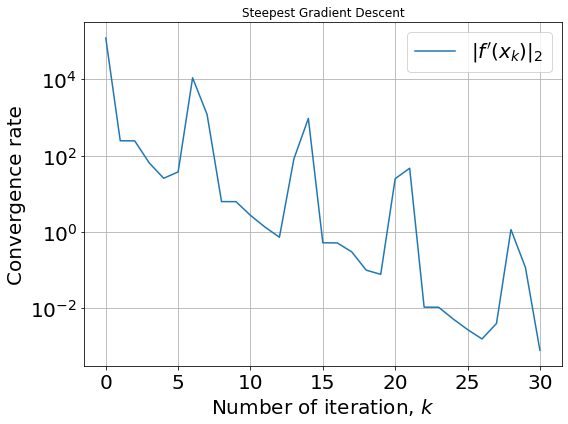

In [12]:
# steepest descent rule
def GradientDescent(grad_f, A, x, tol):
    norm_grad = []    
    x_list = []
    grad = grad_f(x)   
    while np.linalg.norm(grad) > tol:                
        alpha = grad.T @ grad/(grad.T @ A.T @ A @ grad)
        grad = grad_f(x)               
        x = x - alpha * grad        
        norm_grad.append(np.linalg.norm(grad))
        x_list.append(x)
    return x, norm_grad, x_list

x, normgrad, x_list = GradientDescent(grad_f, A, x0, epsilon)
%timeit x, normgrad, x_list = GradientDescent(grad_f, A, x0, epsilon)

plt.figure(figsize=(8,6))
plt.semilogy(normgrad, label=r"$\| f'(x_k) \|_2$")
plt.title(f'Steepest Gradient Descent')
plt.xlabel(r"Number of iteration, $k$", fontsize=20)
plt.ylabel(r"Convergence rate", fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)
plt.grid(True)
plt.tight_layout()
print(f'convergence speed: {len(normgrad)}, f(x*)={f(x)}')

In [13]:
np.random.seed(20)
epsilon = 10e-4
n, m = 1000, 100
A = np.random.rand(n, m)
b = np.random.rand(n)
x0 = np.random.rand(m)
x = x0
f = lambda x: 0.5 * np.linalg.norm(A.dot(x) - b)**2
grad_f = lambda x: A.T.dot(A.dot(x) - b)

Optimal constant step size is 3.978584954406205e-05
Required tolerance achieved!
Convergence in 6350 iterations
Function value = 39.15701637556315
Norm of gradient = 0.0009997067422480015
Required tolerance achieved!
Convergence in 6350 iterations
Function value = 39.15701637556315
Norm of gradient = 0.0009997067422480015
Required tolerance achieved!
Convergence in 6350 iterations
Function value = 39.15701637556315
Norm of gradient = 0.0009997067422480015
Required tolerance achieved!
Convergence in 6350 iterations
Function value = 39.15701637556315
Norm of gradient = 0.0009997067422480015
Required tolerance achieved!
Convergence in 6350 iterations
Function value = 39.15701637556315
Norm of gradient = 0.0009997067422480015
Required tolerance achieved!
Convergence in 6350 iterations
Function value = 39.15701637556315
Norm of gradient = 0.0009997067422480015
Required tolerance achieved!
Convergence in 6350 iterations
Function value = 39.15701637556315
Norm of gradient = 0.0009997067422480

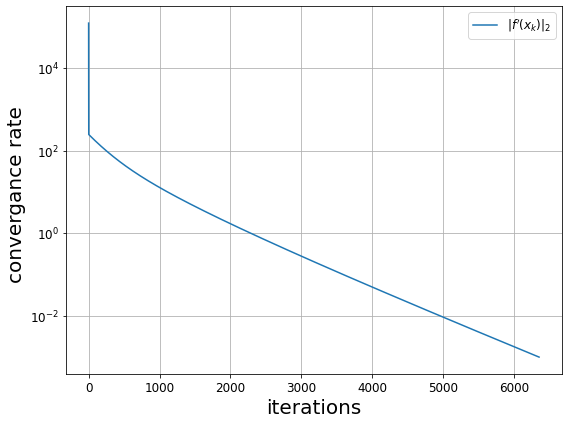

In [14]:
# optimal constant step size

L_inv = 1/max(np.linalg.eigvals(A.T.dot(A))) # L is maximum eigenvalue of hessian 
print(f"Optimal constant step size is {L_inv}")


gd = methods.fo.GradientDescent(f, grad_f, ss.ConstantStepSize(L_inv))
x = gd.solve(x0, tol=epsilon, max_iter=10000, disp=True)
%timeit gd.solve(x0, tol=epsilon, max_iter=10000, disp=True)
x_conv = gd.get_convergence()

grad_conv = [np.linalg.norm(grad_f(x)) for x in x_conv]

plt.figure(figsize=(8,6))
plt.semilogy(grad_conv, label=r"$\| f'(x_k) \|_2$")
plt.xlabel("iterations", fontsize=20)
plt.ylabel("convergance rate ", fontsize=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(loc="best", fontsize=12)
plt.grid(True)
plt.tight_layout()

In [15]:
epsilon = 10e-4
n, m = 1000, 100
A = np.random.rand(n, m)
b = np.random.rand(n)
x = np.random.rand(m)
x0 = x
f = lambda x: 0.5 * np.linalg.norm(A.dot(x) - b)**2
grad_f = lambda x: A.T.dot(A.dot(x) - b)

Required tolerance achieved!
Convergence in 3315 iterations
Function value = 37.29245255057568
Norm of gradient = 0.000999511482302271


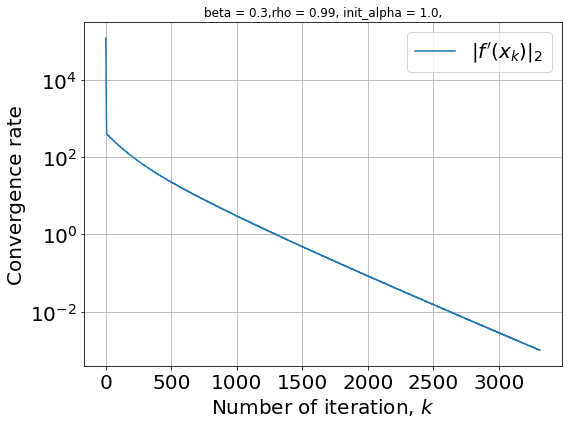

In [16]:

beta = 0.3
rho=0.99
init_alpha =1.

plt.rc("text", usetex=False)
start_time = time.time()

gd = methods.fo.GradientDescent(f, grad_f, ss.Backtracking("Armijo", rho = rho, beta = beta, init_alpha = init_alpha))
%timeit gd.solve(x0, tol=epsilon, max_iter=5000)
x = gd.solve(x0, tol=epsilon, max_iter=5000, disp=True)

x_conv = gd.get_convergence()
grad_conv = [np.linalg.norm(grad_f(x)) for x in x_conv]
plt.figure(figsize=(8,6))
plt.semilogy(grad_conv, label=r"$\| f'(x_k) \|_2$")
plt.title(f'beta = {beta},rho = {rho}, init_alpha = {init_alpha},')
plt.xlabel(r"Number of iteration, $k$", fontsize=20)
plt.ylabel(r"Convergence rate", fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)
plt.grid(True)
plt.tight_layout()

## results
epsilon = 10e-4 in steepest descent rule converges after 31 iterations and 3.87 ms, which is as expected small. We can solve the problem analitically therefore, this method can be applied.
by applying the optimal constant step size method, we achieve that tolerance in 6350 iterations and with Armijo 3315 iterations. So the fastest and the simplest method which can be applied to such quadratic equation is the steepest descend method.

In [17]:
f = lambda x: 0.5 * np.linalg.norm(A.dot(x) - b)**2
grad_f = lambda x: A.T.dot(A.dot(x) - b)

Required tolerance achieved!
Convergence in 2930 iterations
Function value = 37.29245255663448
Norm of gradient = 0.0009999685930070948
377 ms ± 36.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


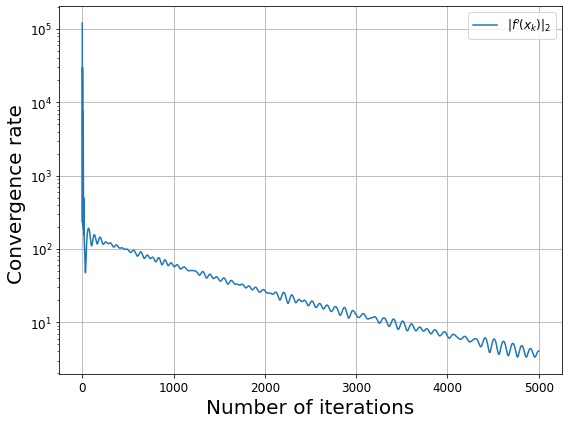

In [18]:
# Accelerated 

gd = methods.fo.AcceleratedGD(f, grad_f, ss.ConstantStepSize(2e-5))
x = gd.solve(x0, tol=epsilon, max_iter=10000, disp=True)
%timeit gd.solve(x0, tol=epsilon, max_iter=5000)

x_conv = gd.get_convergence()

grad_conv = [np.linalg.norm(grad_f(x)) for x in x_conv]

plt.figure(figsize=(8,6))
plt.semilogy(grad_conv, label=r"$\| f'(x_k) \|_2$")
plt.xlabel("Number of iterations", fontsize=20)
plt.ylabel("Convergence rate ", fontsize=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(loc="best", fontsize=12)
plt.grid(True)
plt.tight_layout()

alpha_opt=  0.00014770663599348615 beta_opt=  0.8509593223337695
Required tolerance achieved!
Convergence in 310 iterations
Function value = 37.29245254695999
Norm of gradient = 0.0009874333346906706
21.1 ms ± 1.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


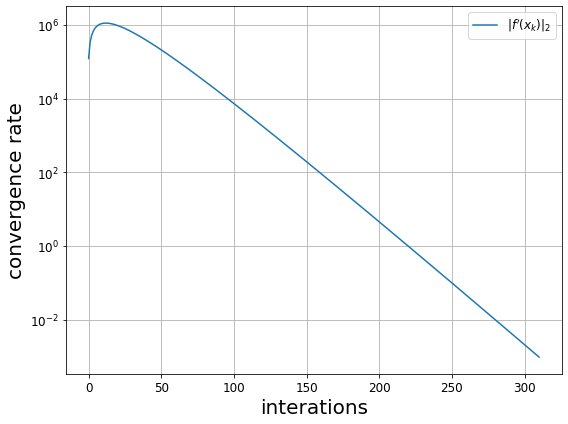

In [19]:
# heavy ball
import liboptpy.base_optimizer as base

mu = np.min(np.linalg.eigvals(A.T.dot(A)))
L =  np.max(np.linalg.eigvals(A.T.dot(A)))
alpha_opt = 4 / (np.sqrt(L) + np.sqrt(mu))**2
beta_opt = np.maximum((1 - np.sqrt(alpha_opt * L))**2, (1 - np.sqrt(alpha_opt * mu))**2)
print('alpha_opt= ', alpha_opt, 'beta_opt= ', beta_opt)

class HeavyBall(base.LineSearchOptimizer):
    def __init__(self, f, grad, step_size, beta, **kwargs):
        super().__init__(f, grad, step_size, **kwargs)
        self._beta = beta
    
    def get_direction(self, x):
        self._current_grad = self._grad(x)
        return -self._current_grad

    def _f_update_x_next(self, x, alpha, h):
        if len(self.convergence) < 2:
            return x + alpha * h
        else:
            return x + alpha * h + self._beta * (x - self.convergence[-2])
    def get_stepsize(self):
        return self._step_size.get_stepsize(self._grad_mem[-1], self.convergence[-1], len(self.convergence))

gd = HeavyBall(f, grad_f, ss.ConstantStepSize(alpha_opt), beta = beta_opt)
x = gd.solve(x0, tol=epsilon, max_iter=10000, disp=True)
%timeit gd.solve(x0, tol=epsilon, max_iter=10000)
x_conv = gd.get_convergence()


grad_conv = [np.linalg.norm(grad_f(x)) for x in x_conv]
plt.figure(figsize=(8,6))
plt.semilogy(grad_conv, label=r"$\| f'(x_k) \|_2$")
plt.xlabel("interations", fontsize=20)
plt.ylabel("convergence rate", fontsize=20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(loc="best", fontsize=12)
plt.grid(True)
plt.tight_layout()

## results
epsilon = 10e-4 in
Accelerated method Convergences in 2930 iterations (267 ms) and 310 iterations with Heavy ball (18.5 ms) method. Heavy ball Converges much faster than GD with appropriate $\alpha, \beta$

__7.__ Consider the simple modification of the previous problem

$$ \frac12 \|Ax - b\|_2 + \lambda \|x\|_1 \to \min_x, $$

where $\lambda >0$ is some fixed constant.

- (3 pts) Consider different values of $\lambda \in \{ 10^{-3}, 10^{-2}, 10^{-1}, 1, 10\}$ and solve the series of the corresponding problems with CVXPy
- (2 pts) What do you observe about the solutions of these problems compared with the solution in the previous problem? How their properties depend on the magnitude of $\lambda$?

In [20]:
import cvxpy as cvx

In [21]:
n = 1000
m = 100
print(cvx.installed_solvers())

['ECOS', 'ECOS_BB', 'OSQP', 'SCIPY', 'SCS']


In [33]:
np.random.seed(22)
A = np.random.randn(n,m)
b = np.random.randn(n)
x = cvx.Variable(m)
t = x
lambda_l = [1e-3,1e-2, 1e-1, 1, 10, 100000] 


In [34]:
for lambda_i in lambda_l:
    obj = cvx.Minimize(1/2 * cvx.norm((A@x-b),2) + lambda_i * cvx.norm(x,1))
    prob = cvx.Problem(obj)
    prob.solve(verbose = False)
    print(f"Optimal value for lambda = {lambda_i} = ", prob.value)

Optimal value for lambda = 0.001 =  14.552946427957531
Optimal value for lambda = 0.01 =  14.57765404741839
Optimal value for lambda = 0.1 =  14.795369929635221
Optimal value for lambda = 1 =  15.404098254122411
Optimal value for lambda = 10 =  15.41055497103285
Optimal value for lambda = 100000 =  15.410554962018246


$$
\frac12 \|Ax - b\|_2 + \lambda \sum t_i  
$$
$$
s.t. -t_i<=x_i<= t_i
$$